**CS412 HW1**
Nural Kaan Özdemir - 29192

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

2024-03-11 18:27:04.459371: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1 Is your nearest neighbor close to you in high-dimensional space?

### 1. Data Generation

In [2]:
def random_points(num_points, num_dimensions):
    return np.random.randn(num_points, num_dimensions)

### 2. Average Distance of A Selected Point

In [3]:
def average_distance_sp(points, selected_point):
    return np.mean(np.linalg.norm(points - selected_point, axis=1))

### 3. Minimum Distance of a Selected Point

In [4]:
def minimum_distance_sp(points, selected_point):
    distances = np.linalg.norm(points - selected_point, axis=1)
    distances = np.delete(distances, np.where(distances == 0))  # Remove distance to the point itself
    return np.min(distances)

### 4. Closest-to-Average Ratio

In [5]:
def closest_to_average_ratio(min_dist, avg_dist):
    return min_dist / avg_dist

### 5. Experimentation and Visualization

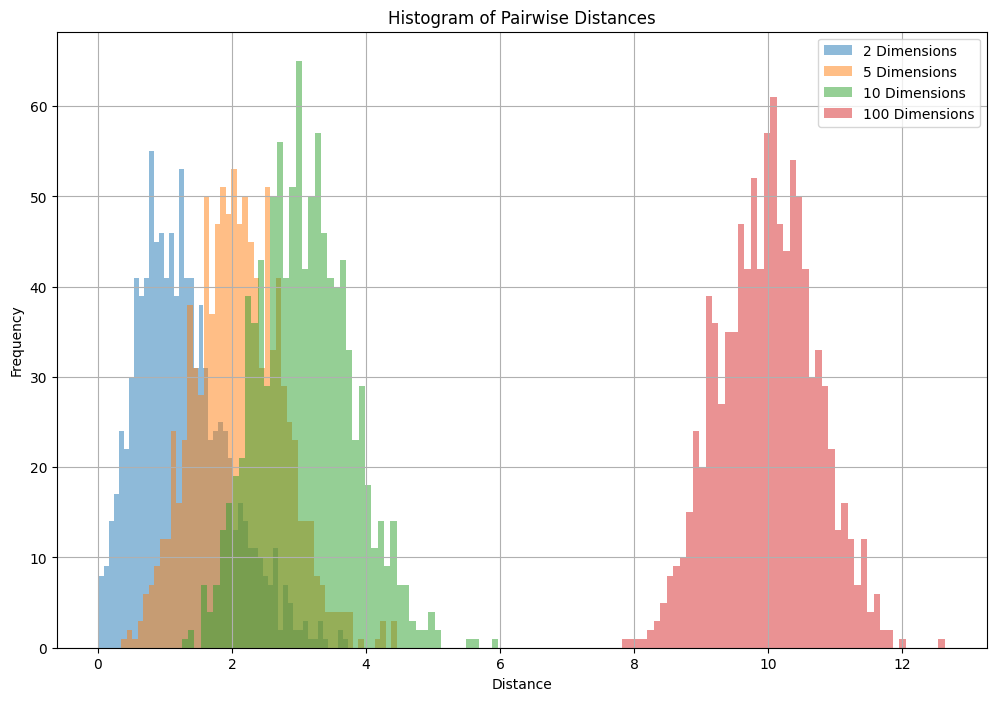

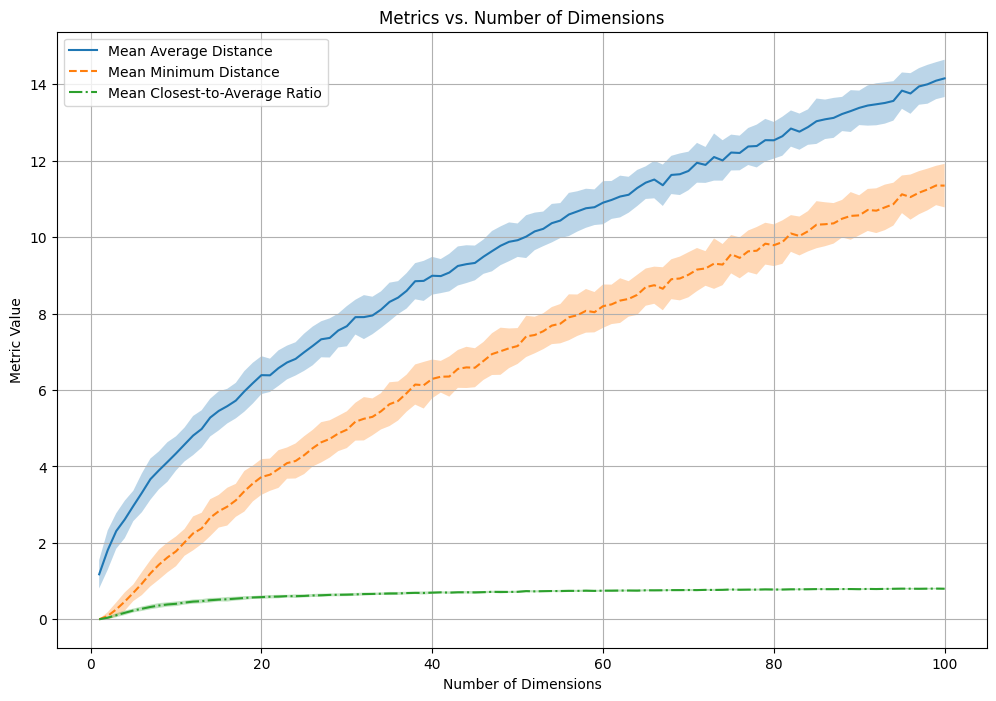

In [6]:
# Function to perform the experiment and visualization
def experiment_and_visualization():
    dimensions = range(1, 101)
    num_points = 1000
    num_trials = 100

    mean_avg_distances = []
    mean_min_distances = []
    mean_closest_to_avg_ratios = []
    std_avg_distances = []
    std_min_distances = []
    std_closest_to_avg_ratios = []
    pairwise_distances = {}

    # Perform experiment for each dimension
    for d in dimensions:
        avg_distances = []
        min_distances = []
        closest_to_avg_ratios = []

        # Generate data points
        points = random_points(num_points, d)

        # Select random points and calculate metrics
        for _ in range(num_trials):
            selected_point = points[np.random.randint(0, num_points)]
            avg_dist = average_distance_sp(points, selected_point)
            min_dist = minimum_distance_sp(points, selected_point)
            closest_to_avg_ratio_val = closest_to_average_ratio(min_dist, avg_dist)

            avg_distances.append(avg_dist)
            min_distances.append(min_dist)
            closest_to_avg_ratios.append(closest_to_avg_ratio_val)

        # Aggregate results
        mean_avg_distances.append(np.mean(avg_distances))
        mean_min_distances.append(np.mean(min_distances))
        mean_closest_to_avg_ratios.append(np.mean(closest_to_avg_ratios))
        std_avg_distances.append(np.std(avg_distances))
        std_min_distances.append(np.std(min_distances))
        std_closest_to_avg_ratios.append(np.std(closest_to_avg_ratios))

        # Store pairwise distances for specific dimensions
        if d in [2, 5, 10, 100]:
            pairwise_distances[d] = np.linalg.norm(points, axis=1)

    # Plot histograms in a single plot
    plt.figure(figsize=(12, 8))
    for d, distances in pairwise_distances.items():
        plt.hist(distances, bins=50, alpha=0.5, label=f"{d} Dimensions")
    plt.title("Histogram of Pairwise Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot line plots for mean and shaded region for standard deviation
    plt.figure(figsize=(12, 8))
    plt.plot(dimensions, mean_avg_distances, label='Mean Average Distance', linestyle='-')
    plt.plot(dimensions, mean_min_distances, label='Mean Minimum Distance', linestyle='--')
    plt.plot(dimensions, mean_closest_to_avg_ratios, label='Mean Closest-to-Average Ratio', linestyle='-.')
    plt.fill_between(dimensions, np.array(mean_avg_distances) - np.array(std_avg_distances), np.array(mean_avg_distances) + np.array(std_avg_distances), alpha=0.3)
    plt.fill_between(dimensions, np.array(mean_min_distances) - np.array(std_min_distances), np.array(mean_min_distances) + np.array(std_min_distances), alpha=0.3)
    plt.fill_between(dimensions, np.array(mean_closest_to_avg_ratios) - np.array(std_closest_to_avg_ratios), np.array(mean_closest_to_avg_ratios) + np.array(std_closest_to_avg_ratios), alpha=0.3)
    plt.title("Metrics vs. Number of Dimensions")
    plt.xlabel("Number of Dimensions")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to perform the experiment and visualization
experiment_and_visualization()

In high-dimensional spaces, the volume increases exponentially with the number of dimensions. Consequently, the points become increasingly sparse, leading to a phenomenon where most pairs of points are approximately equidistant from each other. This implies that the distribution of pairwise distances becomes more uniform as the number of dimensions increases.
As the number of dimensions increases, the mean average distance between points tends to increase. Additionally, the mean minimum distance between points also tends to increase due to the phenomenon of points becoming more uniformly distributed in high-dimensional space.
As the number of dimensions increases, the average distance increases while the closest distance remains relatively constant or increases at a slower rate. Hence, mean closest-to-average ratio remains relatively constant or increases at a slower rate. 

# 2 k-NN Classifier In Action

## 2.1 Dataset

In [7]:
# Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Shuffle the training and validation data
train_shuffle_idx = np.random.permutation(len(train_images))
train_images, train_labels = train_images[train_shuffle_idx], train_labels[train_shuffle_idx]
val_shuffle_idx = np.random.permutation(len(val_images))
val_images, val_labels = val_images[val_shuffle_idx], val_labels[val_shuffle_idx]

## 2.2 Find the Best K

Optimal value of k: 7


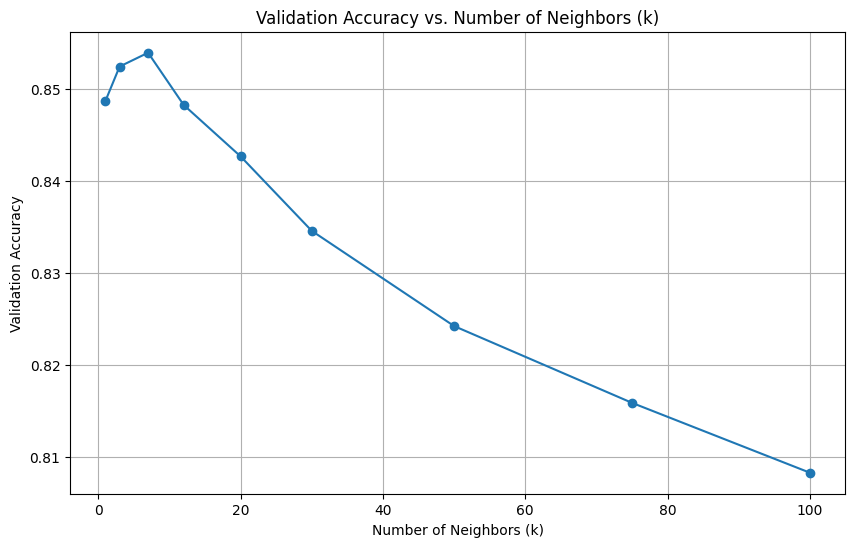

Test accuracy: 0.854


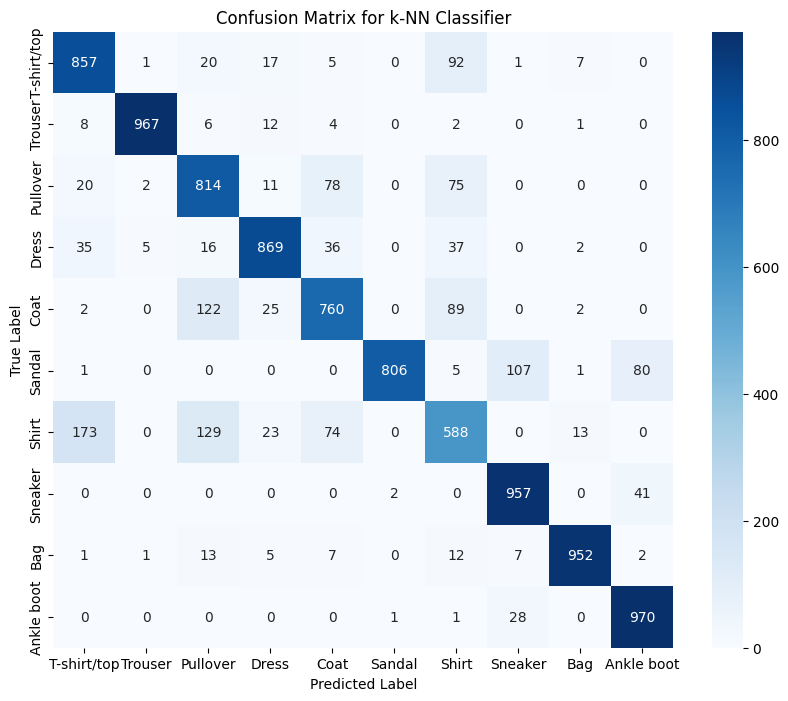

In [8]:
# Define class names for Fashion-MNIST dataset
fashion_mnist_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define values of k to experiment with
k_values = [1, 3, 7, 12, 20, 30, 50, 75, 100]

# Initialize lists to store validation accuracies
validation_accuracies = []

# Iterate over each value of k
for k in k_values:
    # Initialize the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(train_images, train_labels)

    # Evaluate on the validation set
    val_accuracy = knn.score(val_images, val_labels)
    validation_accuracies.append(val_accuracy)

# Find the optimal value of k
optimal_k = k_values[np.argmax(validation_accuracies)]
print("Optimal value of k:", optimal_k)

# Plot the validation accuracy for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, validation_accuracies, marker='o')
plt.title('Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# Retrain the k-NN classifier with the optimal k using combined training and validation sets
combined_train_images = np.concatenate((train_images, val_images))
combined_train_labels = np.concatenate((train_labels, val_labels))

# Initialize the k-NN classifier with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the classifier with combined training and validation sets
knn_optimal.fit(combined_train_images, combined_train_labels)

# Evaluate on the test set
test_accuracy = knn_optimal.score(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Plot the confusion matrix for the final model's predictions across the ten classes
plt.figure(figsize=(10, 8))
test_predictions = knn_optimal.predict(test_images)
cm = confusion_matrix(test_labels, test_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=fashion_mnist_labels, yticklabels=fashion_mnist_labels)
plt.title("Confusion Matrix for k-NN Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

From the confusion matrix above, we can infer that "Shirt", "Sandal" and "Coat" classes have the highest number of misclassifications. 
"Shirt" class is mostly misclassified with "T-shirt/top", "Pullover" and "Coat" classes. 
"Sandal" class is mostly misclassified with "Sneaker" and "Ankle boot" classes. 
"Coat" class is mostly misclassified with "Pullover" and "Shirt" classes. 
Specific pairs such as "Shirt" and "T-shirt/top", "Shirt" and "Pullover", "Coat" and "Pullover" are commonly mistaken for one another.